In [1]:
#pip install ktrain

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import ktrain
from ktrain import text

c:\Users\dai\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load the data
df = pd.read_csv('SMSSpamCollection', sep='\t' ,names=['label','text'])

In [4]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
df.shape

(5572, 2)

### Cross Validate

In [6]:
from sklearn.model_selection import train_test_split
data_train , data_test = train_test_split(df , test_size=0.2 ,random_state=0)

In [7]:
data_train.shape , data_test.shape

((4457, 2), (1115, 2))

### Data Preparation

In [8]:
(X_train , y_train), (X_test ,y_test),prepoc = text.texts_from_df(
    train_df = data_train,
    text_column='text',
    label_columns='label',
    val_df=data_test,
    preprocess_mode='bert'   # or distilbert
)

['ham', 'spam']
      ham  spam
1114  1.0   0.0
3589  1.0   0.0
3095  1.0   0.0
1012  1.0   0.0
3320  1.0   0.0
['ham', 'spam']
      ham  spam
4456  1.0   0.0
690   0.0   1.0
944   1.0   0.0
3768  1.0   0.0
1189  1.0   0.0
preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [9]:
y_train 

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

### Build the Classifier

In [10]:
## use distilbert if you want
model = text.text_classifier(name='bert' ,  # or distilbert
                             train_data=(X_train,y_train),
                             preproc=prepoc)

Is Multi-Label? False
maxlen is 400


c:\Users\dai\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


done.


In [11]:
type(model)

keras.src.engine.functional.Functional

In [12]:
learner = ktrain.get_learner(model=model,
                             train_data=(X_train,y_train),
                             val_data=(X_test ,y_test),
                             batch_size=6
                             )

In [13]:
learner

simulating training for different learning rates... this may take a few moments...


c:\Users\dai\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/2
743/743 [==============================] - 5726s 8s/step - loss: 0.2552 - accuracy: 0.9174
Epoch 2/2
743/743 [==============================] - 2279s 3s/step - loss: 1.4281 - accuracy: 0.8188


done.
Visually inspect loss plot and select learning rate associated with falling loss


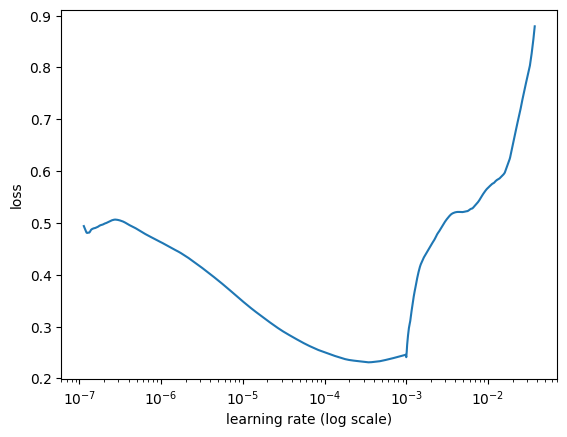

In [14]:
learner.lr_find(show_plot=True , max_epochs=2)

In [15]:
learner.fit_onecycle(lr = 10e-3 , epochs = 1)
predictor = ktrain.get_predictor(learner.model , prepoc)
predictor.save('bertspam--classifier')



begin training using onecycle policy with max lr of 0.01...
743/743 [==============================] - 6148s 8s/step - loss: 0.7335 - accuracy: 0.8216 - val_loss: 0.4126 - val_accuracy: 0.8565


c:\Users\dai\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
learner.fit_onecycle(lr = 2e-5 , epochs = 1)
predictor = ktrain.get_predictor(learner.model , prepoc)



begin training using onecycle policy with max lr of 2e-05...
743/743 [==============================] - 6090s 8s/step - loss: 0.3904 - accuracy: 0.8683 - val_loss: 0.4118 - val_accuracy: 0.8565


In [17]:
msg1 = ["Freemsg : 1-month"]